<a href="https://colab.research.google.com/github/rajnish200/rainy/blob/main/final_ipynb_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.
Dataset shape: (614, 13)

First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Ur

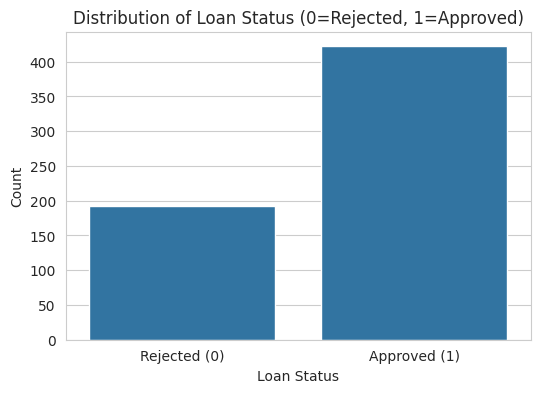


Percentage distribution of Loan Status:
Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64
The dataset is imbalanced, with more approved loans than rejected ones.


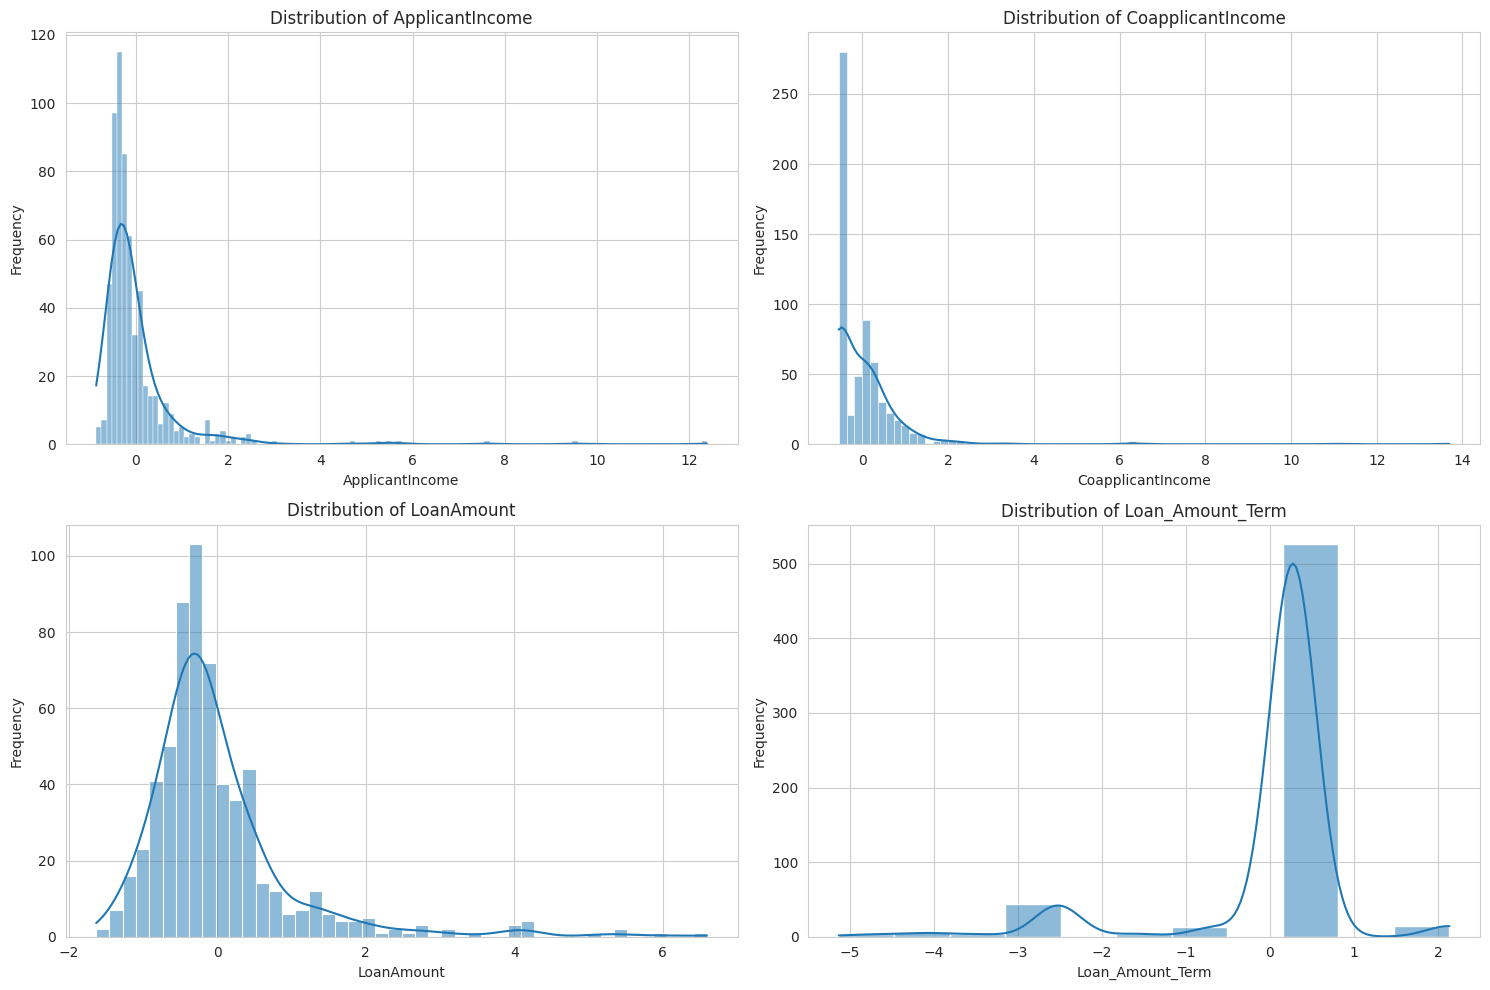

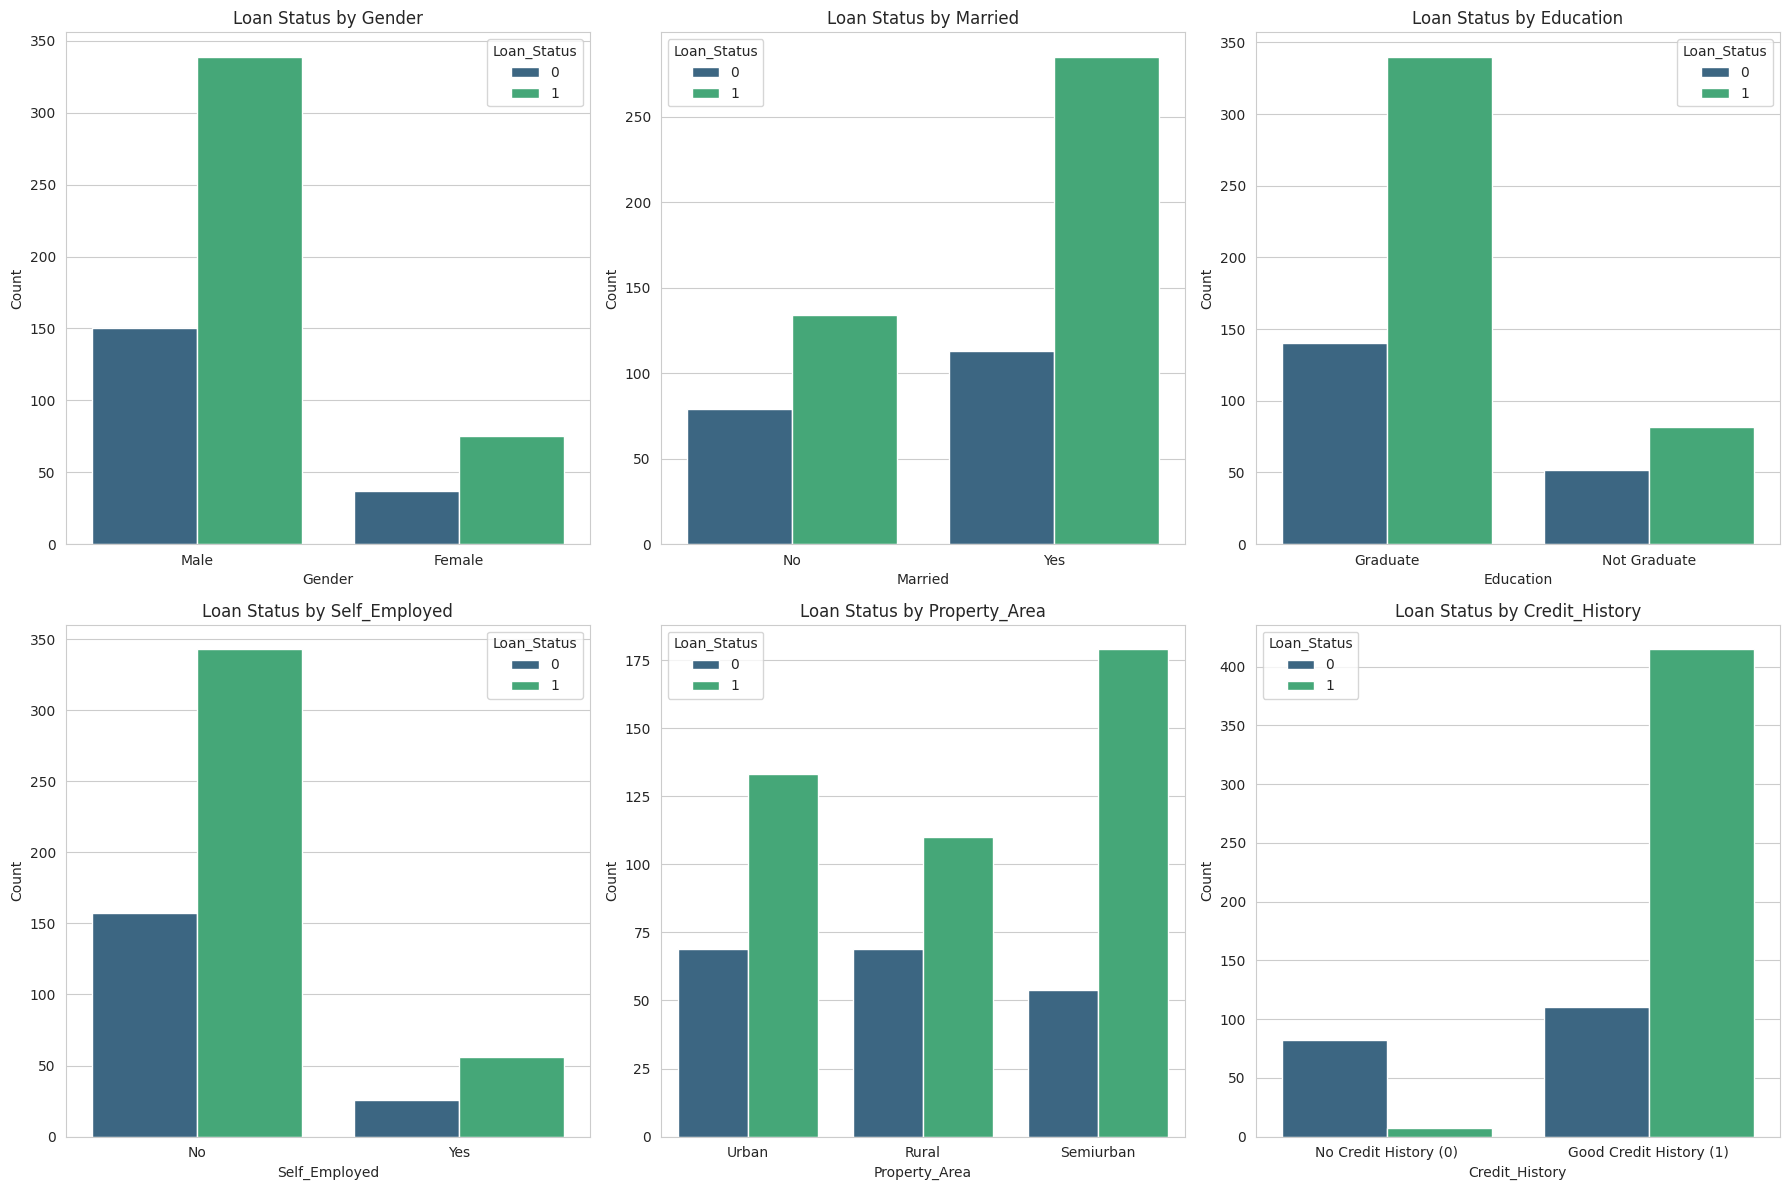

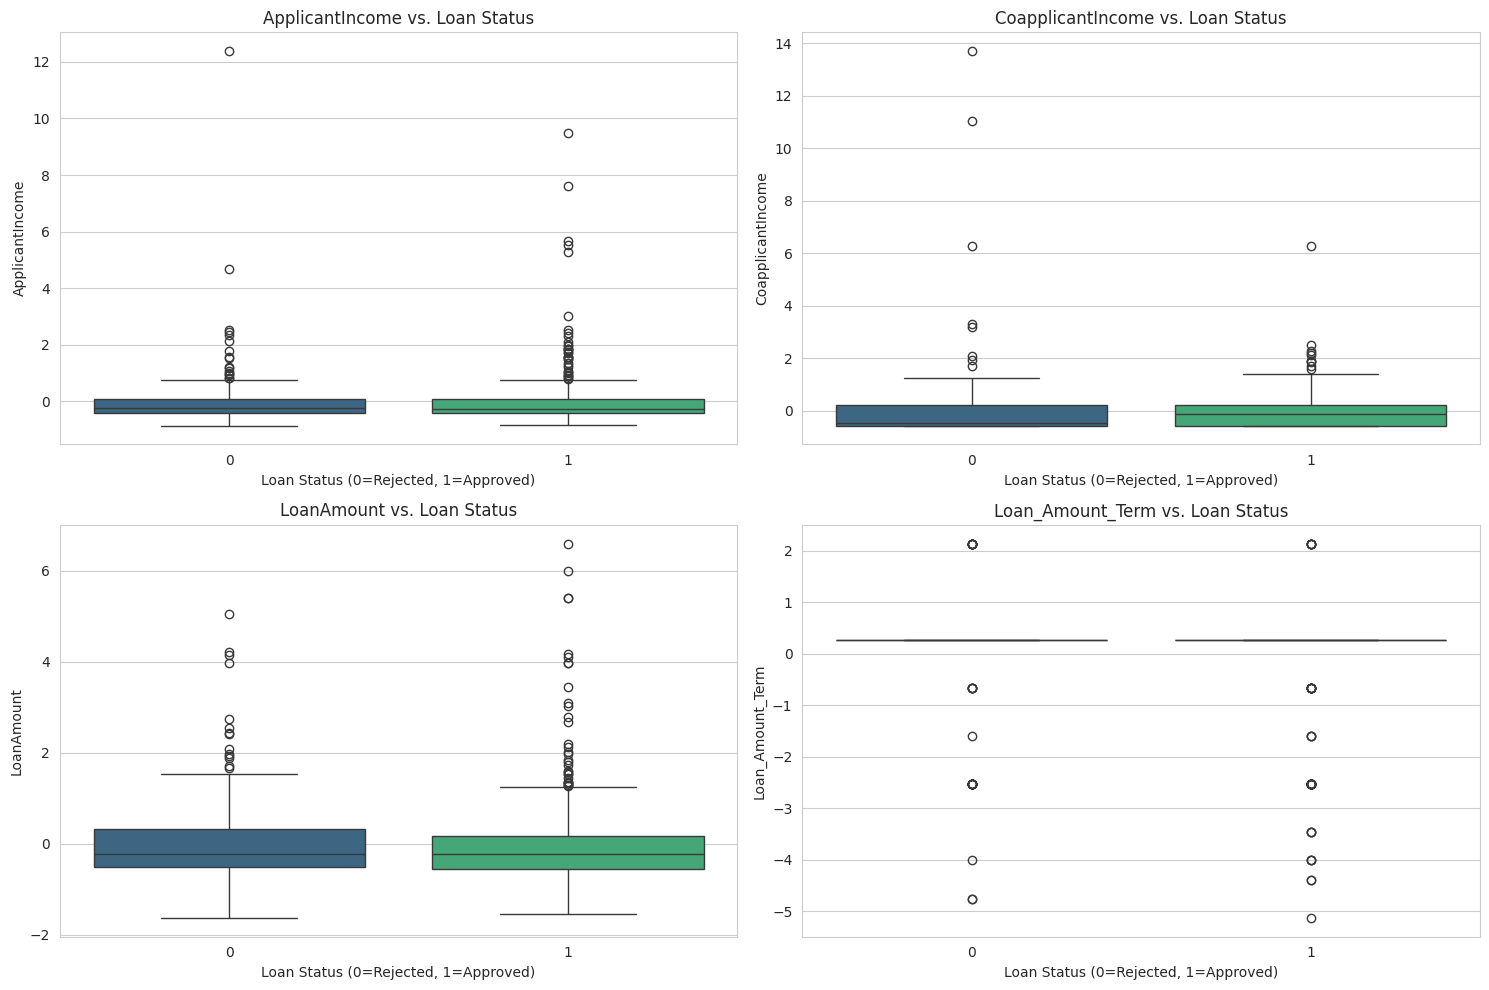

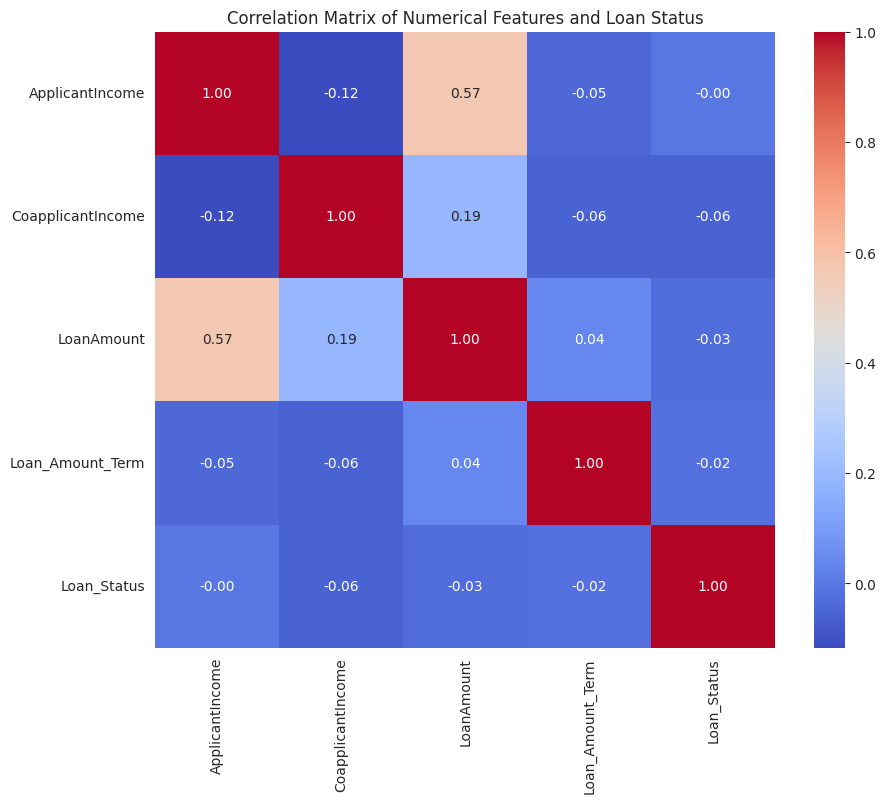


Key EDA Insights:
- The target variable 'Loan_Status' is imbalanced, with more approved loans.
- 'Credit_History' appears to be the most significant factor: applicants with good credit history (1.0) are much more likely to get their loan approved.
- 'ApplicantIncome' and 'LoanAmount' show some variations with loan status, but not as strong as 'Credit_History'.
- 'CoapplicantIncome' doesn't seem to have a strong direct correlation with loan status.
- 'Married' applicants seem to have a slightly higher approval rate.
- 'Education' (Graduates) and 'Property_Area' (Semiurban) also show some influence on loan status.
X_train shape: (491, 12)
X_test shape: (123, 12)
y_train shape: (491,)
y_test shape: (123,)
--- Logistic Regression Model ---

Accuracy Score:
0.8617886178861789

Confusion Matrix:
[[22 16]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91   

In [23]:
#The process involves:
#1. Data Preprocessing: Cleaning and preparing the data.
#2. Exploratory Data Analysis (EDA): Visualizing and understanding the data.
#3. Model Building: Training and evaluating various classification algorithms.
#4. Model Comparison: Selecting the best performing model.

# # Loan Prediction Model
#
# This project focuses on predicting loan approval status based on applicant data. We will go through the standard machine learning pipeline: data preprocessing, exploratory data analysis, model building, and model evaluation.
#
# ## Dataset
# The dataset used is `loan_data.csv`, containing various features about loan applicants and their `Loan_Status` (Y/N).
#
# ## Features:
# - `Loan_ID`: Unique Loan ID (will be dropped)
# - `Gender`: Applicant's gender
# - `Married`: Marital status
# - `Dependents`: Number of dependents
# - `Education`: Applicant's education level
# - `Self_Employed`: Whether the applicant is self-employed
# - `ApplicantIncome`: Applicant's income
# - `CoapplicantIncome`: Co-applicant's income
# - `LoanAmount`: Loan amount requested
# - `Loan_Amount_Term`: Term of loan in months
# - `Credit_History`: Credit history meets guidelines (1.0 for yes, 0.0 for no)
# - `Property_Area`: Urban, Semiurban, or Rural
# - `Loan_Status`: Loan approved (Y/N) - **Target Variable**


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')

# Phase 1: Data Preprocessing

# Load the dataset
try:
    df = pd.read_csv('loan_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'loan_data.csv' not found. Please ensure the file is in the correct directory.")

    data = {
        'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008'],
        'Gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
        'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
        'Dependents': ['0', '1', '0', '0', '0'],
        'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
        'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
        'ApplicantIncome': [5849, 4583, 3000, 2583, 6000],
        'CoapplicantIncome': [0.0, 1508.0, 0.0, 2358.0, 0.0],
        'LoanAmount': [np.nan, 128.0, 66.0, 120.0, 141.0],
        'Loan_Amount_Term': [360.0, 360.0, 360.0, 360.0, 360.0],
        'Credit_History': [1.0, 1.0, 1.0, 1.0, 1.0],
        'Property_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'Y']
    }
    df = pd.DataFrame(data)
    print("Using a dummy dataset for demonstration.")

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
df.info()
print("\nMissing values before handling:")
print(df.isnull().sum())


# Drop Loan_ID column
df = df.drop('Loan_ID', axis=1)
print("\n'Loan_ID' column dropped.")
print(f"Dataset shape after dropping 'Loan_ID': {df.shape}")


# Fill numerical missing values with the median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
        print(f"Missing values in '{col}' filled with median.")

# Fill categorical missing values with the mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Missing values in '{col}' filled with mode.")

print("\nMissing values after handling:")
print(df.isnull().sum())

# Convert '3+' in Dependents to 3
if 'Dependents' in df.columns and '3+' in df['Dependents'].unique():
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    print("Replaced '3+' with '3' in 'Dependents' column.")

# Convert Dependents to numeric
df['Dependents'] = pd.to_numeric(df['Dependents'])
print("Converted 'Dependents' column to numeric.")

# Label Encoding for the target variable 'Loan_Status'
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status']) # Y=1, N=0
print(f"Encoded 'Loan_Status': {le.classes_} mapped to {le.transform(le.classes_)}")

# One-Hot Encoding for other categorical features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity
print("\nOne-Hot Encoding applied to categorical columns.")
print(f"Dataset shape after One-Hot Encoding: {df.shape}")
print("\nFirst 5 rows after encoding:")
print(df.head())

# Identify numerical columns for scaling
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\nNumerical features scaled using StandardScaler.")
print("\nFirst 5 rows after scaling:")
print(df.head())


# ## Phase 2: Exploratory Data Analysis (EDA)

# Separate features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


# Distribution of Loan Status

plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status (0=Rejected, 1=Approved)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rejected (0)', 'Approved (1)'])
plt.show()

loan_status_counts = df['Loan_Status'].value_counts(normalize=True) * 100
print("\nPercentage distribution of Loan Status:")
print(loan_status_counts)
print("The dataset is imbalanced, with more approved loans than rejected ones.")

# ### Distribution of Numerical Features
# Histograms to visualize the distribution of numerical features.

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# ### Relationship between Categorical Features and Loan Status
# Bar plots to compare categorical features against `Loan_Status`.

# Original categorical columns (before one-hot encoding)
original_categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

plt.figure(figsize=(18, 12))
for i, col in enumerate(original_categorical_cols):
    if col in df.columns or any(c.startswith(col) for c in df.columns):
        plt.subplot(2, 3, i + 1)
        # For Credit_History, use the original numerical values (0 or 1)
        if col == 'Credit_History':
            sns.countplot(x=col, hue='Loan_Status', data=df, palette='viridis')
            plt.title(f'Loan Status by {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(ticks=[0, 1], labels=['No Credit History (0)', 'Good Credit History (1)'])
        else:
            if col in globals() and 'df_original' in globals(): # If we had an original df
                 sns.countplot(x=col, hue='Loan_Status', data=df_original, palette='viridis')
            else:
                temp_df_eda = pd.read_csv('loan_data.csv')
                temp_df_eda['Loan_Status'] = le.fit_transform(temp_df_eda['Loan_Status'])
                if col == 'Dependents':
                    temp_df_eda['Dependents'] = temp_df_eda['Dependents'].replace('3+', '3').astype(float)
                sns.countplot(x=col, hue='Loan_Status', data=temp_df_eda, palette='viridis')
                plt.title(f'Loan Status by {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ### Relationship between Numerical Features and Loan Status
# Box plots to visualize the distribution of numerical features for each loan status.


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Loan_Status', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs. Loan Status')
    plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Heatmap to visualize the correlation between numerical variables.

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Loan_Status']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Loan Status')
plt.show()

print("\nKey EDA Insights:")
print("- The target variable 'Loan_Status' is imbalanced, with more approved loans.")
print("- 'Credit_History' appears to be the most significant factor: applicants with good credit history (1.0) are much more likely to get their loan approved.")
print("- 'ApplicantIncome' and 'LoanAmount' show some variations with loan status, but not as strong as 'Credit_History'.")
print("- 'CoapplicantIncome' doesn't seem to have a strong direct correlation with loan status.")
print("- 'Married' applicants seem to have a slightly higher approval rate.")
print("- 'Education' (Graduates) and 'Property_Area' (Semiurban) also show some influence on loan status.")


# ## Phase 3: Model Building

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# ### 1. Logistic Regression

print("--- Logistic Regression Model ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


# ### 2. Decision Tree Classifier


print("--- Decision Tree Classifier Model ---")
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# ### 3. Random Forest Classifier

print("--- Random Forest Classifier Model ---")
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ## Phase 4: Model Comparison

# Let's compare the performance of all trained models based on their accuracy, precision, recall, and F1-score.

models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (0)', 'Recall (0)', 'F1-Score (0)', 'Precision (1)', 'Recall (1)', 'F1-Score (1)'])

for model_name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    results = pd.concat([results, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1-Score (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-Score (1)': report['1']['f1-score']
    }])], ignore_index=True)

print("\nModel Comparison Table:")
print(results.round(4))

